<a href="https://colab.research.google.com/github/Jeremy-su1/ai-algorithm/blob/main/CLASSIFICATION1_LLMembed_shkim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch transformers tqdm datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.7 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset, ClassLabel, DatasetDict

agnews_dataset = load_dataset("fancyzhx/ag_news")
print(agnews_dataset['train'].features)

new_labels = agnews_dataset["train"].features["label"].names + ["StackOverFlow"]
new_class_label = ClassLabel(names=new_labels)

# 새로운 클래스 레이블을 기존 데이터셋에 적용하기 위해 데이터셋을 업데이트합니다.
updated_features = agnews_dataset["train"].features.copy()
updated_features["label"] = new_class_label

agnews_dataset = agnews_dataset.cast(updated_features)

# 결과 출력
print(agnews_dataset['train'].features)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['World', 'Sports', 'Business', 'Sci/Tech'], id=None)}


Casting the dataset:   0%|          | 0/120000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/7600 [00:00<?, ? examples/s]

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['World', 'Sports', 'Business', 'Sci/Tech', 'StackOverFlow'], id=None)}


In [ ]:
from datasets import Dataset, DatasetDict
from datasets import load_dataset, concatenate_datasets
from datasets import ClassLabel, Value

sof_dataset_train = load_dataset(
    'csv',
    data_files='/content/drive/MyDrive/LLMEmbed/convert_train.csv',
    split='train'
)
# print(sof_dataset_train)

class_label = ClassLabel(num_classes=5, names=['World', 'Sports', 'Business', 'Sci/Tech', 'StackOverFlow'])

# 데이터셋에서 30000건 추출
sof_train_samples = sof_dataset_train.shuffle(seed=42).select(range(30000))
# 'Concat_Text' 필드를 'text'로, 그리고 'label' 값을 'StackOverFlow'로 설정
sof_train_samples = sof_train_samples.map(lambda example: {'text': example['Concat_Text'], 'label': class_label.str2int('StackOverFlow')}, remove_columns=['Id', 'Title', 'Body', 'Tags', 'CreationDate', 'Y', 'Cleaned_tag ', 'Cleaned_tag', 'Array_Tag', 'Filtered_Array_Tag', 'Filtered_Tag', 'Concat_Text'])

# sof_train_samples의 features를 업데이트
sof_train_samples = sof_train_samples.cast_column('label', class_label)

# sof_train_samples와 agnews_train을 결합
combined_train_dataset = concatenate_datasets([agnews_dataset["train"], sof_train_samples])

# 결과를 확인
print(combined_train_dataset)

# 레이블의 데이터 건수 카운트
label_counts = combined_train_dataset.features['label'].num_classes
label_counter = {label: 0 for label in range(label_counts)}

for example in combined_train_dataset:
    label_counter[example['label']] += 1

print(label_counter)

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/30000 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label'],
    num_rows: 150000
})
{0: 30000, 1: 30000, 2: 30000, 3: 30000, 4: 30000}


In [ ]:
pip install matplotlib

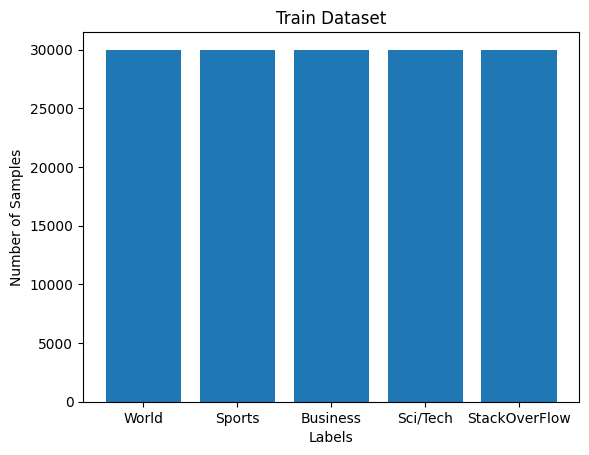

In [ ]:
import matplotlib.pyplot as plt

# 레이블별 데이터 건수 시각화
labels = list(label_counter.keys())
counts = list(label_counter.values())

plt.bar(labels, counts, tick_label=class_label.names) # class_label.names를 사용하여 레이블 이름을 표시합니다.
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Train Dataset')
plt.show()

In [ ]:
sof_dataset_test = load_dataset(
    'csv',
    data_files='/content/drive/MyDrive/LLMEmbed/convert_valid.csv',
    split='train'
)
sof_test_samples = sof_dataset_test.shuffle(seed=42).select(range(1900))
# 'Concat_Text' 필드를 'text'로, 그리고 'label' 값을 'StackOverFlow'로 설
sof_test_samples = sof_test_samples.map(lambda example: {'text': example['Concat_Text'], 'label': class_label.str2int('StackOverFlow')}, remove_columns=['Id', 'Title', 'Body', 'Tags', 'CreationDate', 'Y', 'Cleaned_tag ', 'Cleaned_tag', 'Array_Tag', 'Filtered_Array_Tag', 'Filtered_Tag', 'Concat_Text'])

# sof_train_samples의 features를 업데이트
sof_test_samples = sof_test_samples.cast_column('label', class_label)

combined_test_dataset = concatenate_datasets([agnews_dataset["test"], sof_test_samples])

# 결과 확인
print(combined_test_dataset)

# 레이블의 데이터 건수 카운트
label_counts = combined_test_dataset.features['label'].num_classes
label_counter = {label: 0 for label in range(label_counts)}

for example in combined_test_dataset:
    label_counter[example['label']] += 1

print(label_counter)


Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1900 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/1900 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label'],
    num_rows: 9500
})
{0: 1900, 1: 1900, 2: 1900, 3: 1900, 4: 1900}


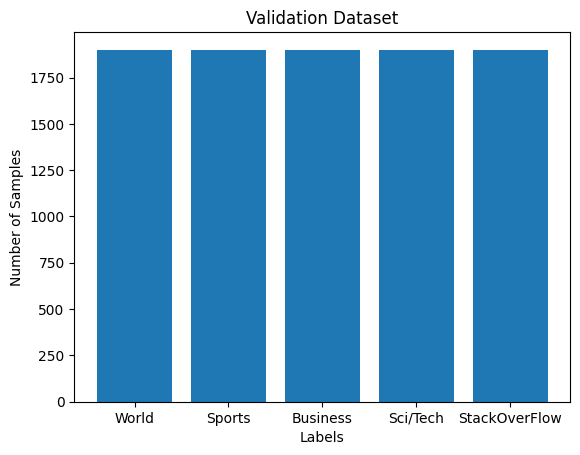

In [ ]:
import matplotlib.pyplot as plt

# 레이블별 데이터 건수 시각화
labels = list(label_counter.keys())
counts = list(label_counter.values())

plt.bar(labels, counts, tick_label=class_label.names) # class_label.names를 사용하여 레이블 이름을 표시합니다.
plt.xlabel('Labels')
plt.ylabel('Number of Samples')
plt.title('Validation Dataset')
plt.show()

In [ ]:
from transformers import AutoTokenizer

new_agnews_dataset= DatasetDict({
    "train": combined_train_dataset,
    "test": combined_test_dataset
})

# DatasetDict 출력
print(new_agnews_dataset)

# tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-large")

# def tokenize_function(examples):
#     return tokenizer(examples["text"], padding="max_length", truncation=True)

# tokenized_datasets = new_agnews_dataset.map(tokenize_function, batched=True)



# small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1500))
# small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1500))

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 9500
    })
})


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/150000 [00:00<?, ? examples/s]

Map:   0%|          | 0/9500 [00:00<?, ? examples/s]

# **1. Llama2 Embedding**

In [ ]:
# -*- coding: utf-8 -*-
import os
import torch
import json
from transformers import AutoConfig, AutoModelForCausalLM, AutoTokenizer
from tqdm import trange
from datasets import load_dataset
import argparse

def rep_extract(task, mode, device, sents, labels, max_len, step):
    model_id = "daryl149/llama-2-7b-chat-hf"

    # model_id = "kimnt93/chat-llama2-1b-1.0"

    tokenizer = AutoTokenizer.from_pretrained(model_id)
    tokenizer.pad_token = "[PAD]"
    tokenizer.padding_side = "right"

    config_kwargs = {
        "trust_remote_code": True,
        "cache_dir": None,
        "revision": 'main',
        "use_auth_token": None,
        "output_hidden_states": True
    }
    model_config = AutoConfig.from_pretrained(model_id, **config_kwargs)
    model = AutoModelForCausalLM.from_pretrained(
        model_id,
        trust_remote_code=True,
        config=model_config,
        device_map=device,
        torch_dtype=torch.float16)
    model.eval()

    sents_reps = []
    # for idx in trange(0, 20, step):
    for idx in trange(0, len(sents), step):
        idx_end = idx + step
        if idx_end > len(sents):
            idx_end = len(sents)
        sents_batch = sents[idx: idx_end]

        sents_batch_encoding = tokenizer(sents_batch, return_tensors='pt', max_length=max_len, padding="max_length", truncation=True)
        sents_batch_encoding = sents_batch_encoding.to(device)

        with torch.no_grad():
            batch_outputs = model(**sents_batch_encoding)
            # 마지막 5개 레이어에서 평균 표현을 추출
            reps_batch_5L = []
            for layer in range(-1, -6, -1):
                reps_batch_5L.append(torch.mean(batch_outputs.hidden_states[layer], axis=1))
            # 5개 레이어의 평균 표현을 하나의 텐서로 구성
            reps_batch_5L = torch.stack(reps_batch_5L, axis=1)

        sents_reps.append(reps_batch_5L.cpu())
    sents_reps = torch.cat(sents_reps)

    # label은 별도의 텐서로 구성
    for idx in range(len(labels)):
        labels[idx] = torch.tensor(labels[idx])
    labels = torch.stack(labels)

    print(sents_reps.shape)
    print(labels.shape)
    path = f'/content/drive/MyDrive/LLMEmbed/llama2/{task}/dataset_tensor/'
    if not os.path.exists(path):
        os.makedirs(path)
    torch.save(sents_reps.to('cpu'), path + f'{mode}_sents.pt')
    torch.save(labels, path + f'{mode}_labels.pt')

if __name__ == '__main__':
    cuda_no = 0 # GPU 번호
    task = 'agnews' # Task 이름
    device = f'cuda:{cuda_no}'

    # dataset = load_dataset("dxgp/R8")
    sents = new_agnews_dataset['train']['text']
    labels = new_agnews_dataset['train']['label']
    rep_extract(task, 'train', device, sents, labels, 256, 40)

    sents = new_agnews_dataset['test']['text']
    labels = new_agnews_dataset['test']['label']
    rep_extract(task, 'test', device, sents, labels, 256, 40)


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

100%|██████████| 3750/3750 [49:05<00:00,  1.27it/s]


torch.Size([150000, 5, 4096])
torch.Size([150000])


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 238/238 [03:06<00:00,  1.27it/s]


torch.Size([9500, 5, 4096])
torch.Size([9500])


# **2. BERT Embedding**

In [ ]:
# -*- coding: utf-8 -*-
import os
import torch
import json
from transformers import BertTokenizer, BertModel
from tqdm import trange
from datasets import load_dataset
import argparse

def rep_extract(task, mode, device, sents, labels):
    model_path = 'google-bert/bert-large-uncased'
    tokenizer = BertTokenizer.from_pretrained(model_path)
    model = BertModel.from_pretrained(model_path).to(device)
    model.eval()

    max_len = 512
    sents_reps = []
    step = 512
    for idx in trange(0, len(sents), step):
        idx_end = idx + step
        if idx_end > len(sents):
            idx_end = len(sents)
        sents_batch = sents[idx: idx_end]

        sents_batch_encoding = tokenizer(sents_batch, return_tensors='pt', max_length=max_len, padding="max_length", truncation=True)
        sents_batch_encoding = sents_batch_encoding.to(device)

        with torch.no_grad():
            batch_outputs = model(**sents_batch_encoding)
            # 출력 중 pooler_output ([CLS] 토큰의 representation)을 임베딩으로 사용.
            # [CLS]는 "classification"의 약자로, 문장이나 문서 수준의 분류 작업에 주로 사용.
            # 사전 훈련 시 BERT는 다양한 문맥에서 [CLS] 토큰이 문장 전체의 요약 정보를 담을 수 있도록 학습
            reps_batch = batch_outputs.pooler_output
        sents_reps.append(reps_batch.cpu())
    sents_reps = torch.cat(sents_reps)

    for idx in range(len(labels)):
        labels[idx] = torch.tensor(labels[idx])
    labels = torch.stack(labels)

    print(sents_reps.shape)
    print(labels.shape)
    path = f'/content/drive/MyDrive/LLMEmbed/bert/{task}/dataset_tensor/'
    if not os.path.exists(path):
        os.makedirs(path)
    torch.save(sents_reps.to('cpu'), path + f'{mode}_sents.pt')
    torch.save(labels, path + f'{mode}_labels.pt')

if __name__ == '__main__':

    cuda_no = 0 # GPU 번호
    task = 'agnews' # Task 이름
    device = f'cuda:{cuda_no}'

    # dataset = load_dataset("dxgp/R8")
    print(new_agnews_dataset)
    print(new_agnews_dataset['train'][0])
    sents = new_agnews_dataset['train']['text']

    labels = new_agnews_dataset['train']['label']
    rep_extract(task, 'train', device, sents, labels)

    sents = new_agnews_dataset['test']['text']
    labels = new_agnews_dataset['test']['label']
    rep_extract(task, 'test', device, sents, labels)



DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 150000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 9500
    })
})
{'text': "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'label': 2}


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

100%|██████████| 293/293 [50:51<00:00, 10.41s/it]


torch.Size([150000, 1024])
torch.Size([150000])


100%|██████████| 19/19 [03:13<00:00, 10.17s/it]

torch.Size([9500, 1024])
torch.Size([9500])


# **3. Roberta Embedding**

In [ ]:
# -*- coding: utf-8 -*-
import os
import torch
import json
from transformers import RobertaTokenizer, RobertaModel
from tqdm import trange
from datasets import load_dataset
import argparse

def rep_extract(task, mode, device, sents, labels):
    model_path = 'FacebookAI/roberta-large'
    tokenizer = RobertaTokenizer.from_pretrained(model_path)
    model = RobertaModel.from_pretrained(model_path).to(device)
    model.eval()

    max_len = 512
    sents_reps = []
    step = 512
    for idx in trange(0, len(sents), step):
        idx_end = idx + step
        if idx_end > len(sents):
            idx_end = len(sents)
        sents_batch = sents[idx: idx_end]

        sents_batch_encoding = tokenizer(sents_batch, return_tensors='pt', max_length=max_len, padding="max_length", truncation=True)
        sents_batch_encoding = sents_batch_encoding.to(device)

        with torch.no_grad():
            batch_outputs = model(**sents_batch_encoding)
            # 첫 번째 토큰([CLS] 토큰에 해당)의 표현을 추출
            reps_batch = batch_outputs.last_hidden_state[:, 0, :]
        sents_reps.append(reps_batch.cpu())
    sents_reps = torch.cat(sents_reps)

    for idx in range(len(labels)):
        labels[idx] = torch.tensor(labels[idx])
    labels = torch.stack(labels)

    print(sents_reps.shape)
    print(labels.shape)
    path = f'/content/drive/MyDrive/LLMEmbed/roberta/{task}/dataset_tensor/'
    if not os.path.exists(path):
        os.makedirs(path)
    torch.save(sents_reps.to('cpu'), path + f'{mode}_sents.pt')
    torch.save(labels, path + f'{mode}_labels.pt')

if __name__ == '__main__':
    cuda_no = 0 # GPU 번호
    task = 'agnews' # Task 이름
    device = f'cuda:{cuda_no}'

    # dataset = load_dataset("dxgp/R8")
    sents = new_agnews_dataset['train']['text']
    labels = new_agnews_dataset['train']['label']
    rep_extract(task, 'train', device, sents, labels)

    sents = new_agnews_dataset['test']['text']
    labels = new_agnews_dataset['test']['label']
    rep_extract(task, 'test', device, sents, labels)


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 293/293 [54:49<00:00, 11.23s/it]


torch.Size([150000, 1024])
torch.Size([150000])


Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 19/19 [03:29<00:00, 11.03s/it]

torch.Size([9500, 1024])
torch.Size([9500])


# **4. Dataset 정의**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

    # 4개의 텐서 파일을 가져옴
    def __init__(self, mode, l_path, b_path, r_path):
        self.l_sents_reps = torch.load(l_path + f'{mode}_sents.pt')
        self.b_sents_reps = torch.load(b_path + f'{mode}_sents.pt')
        self.r_sents_reps = torch.load(r_path + f'{mode}_sents.pt')

        self.labels = torch.load(l_path + f'{mode}_labels.pt')

        self.sample_num = self.labels.shape[0]

    # 인덱스를 받아 해당 샘플의 데이터를 반환하는 메소드
    def __getitem__(self, index):
        return self.l_sents_reps[index], self.b_sents_reps[index], self.r_sents_reps[index], self.labels[index]

    # 데이터셋의 총 샘플 수를 반환하는 메소드
    def __len__(self):
        return self.sample_num

# **5. Model operation (multi)**

In [ ]:
import torch
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from tqdm import tqdm
import numpy as np

# epoch - Train
def Train_multi(dataloader, device, model, loss_fn, optimizer):
    loss_list, acc_list, micro_f1_list, macro_f1_list = [], [], [], []

    for batch_i, batch_loader in enumerate(tqdm(dataloader)):
        batch_l, batch_b, batch_r, batch_y = batch_loader
        batch_l, batch_b, batch_r, batch_y = batch_l.to(device), batch_b.to(device), batch_r.to(device), batch_y.to(device)

        model.train()
        pred = model(batch_l.float(), batch_b.float(), batch_r.float())
        loss = loss_fn(pred, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        pred_y = torch.max(pred, 1).indices
        # print(pred_y)
        acc = accuracy_score(batch_y.cpu(), pred_y.cpu())
        micro_f1 = f1_score(batch_y.cpu(), pred_y.cpu(), average='micro')
        macro_f1 = f1_score(batch_y.cpu(), pred_y.cpu(), average='macro')
        loss = loss.cpu()

        loss_list.append(loss.item())
        acc_list.append(acc)
        micro_f1_list.append(micro_f1)
        macro_f1_list.append(macro_f1)
    print(f'loss: {np.mean(loss_list):.4f}')
    print(f'acc: {np.mean(acc_list):.4f}')
    print(f'micro_f1: {np.mean(micro_f1_list):.4f}')
    print(f'macro_f1: {np.mean(macro_f1_list):.4f}')

def Test_multi(dataloader, device, model, loss_fn):
    avg_loss = 0
    total_pred, total_y = [], []

    for batch_i, batch_loader in enumerate(tqdm(dataloader)):
        batch_l, batch_b, batch_r, batch_y = batch_loader
        batch_l, batch_b, batch_r, batch_y = batch_l.to(device), batch_b.to(device), batch_r.to(device), batch_y.to(device)

        model.eval()
        with torch.no_grad():
            pred = model(batch_l.float(), batch_b.float(), batch_r.float())
            loss = loss_fn(pred, batch_y)
            loss = loss.to('cpu')
            avg_loss += loss.item()

        pred_y = torch.max(pred, 1).indices
        total_pred.append(pred_y.cpu())
        total_y.append(batch_y.cpu())

    avg_loss = avg_loss / (batch_i+1)

    total_y = torch.cat(total_y)
    total_pred = torch.cat(total_pred)
    acc = accuracy_score(total_y, total_pred)
    micro_f1 = f1_score(total_y.cpu(), total_pred.cpu(), average='micro')
    macro_f1 = f1_score(total_y.cpu(), total_pred.cpu(), average='macro')

    print(f'avg loss: {avg_loss:.4f}')
    print(f'acc: {acc:.4f}')
    print(f'micro_f1: {micro_f1:.4f}')
    print(f'macro_f1: {macro_f1:.4f}')

In [ ]:
!pip install -q evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.8 MB/s eta 0:00:00


# * Model Operation - 검증셋 테스트

In [ ]:
import numpy as np
import wandb
import evaluate
from tqdm import tqdm
import torch

wandb.init(project="huggingface") # Uncomment to use wandb

# Load metrics
accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

# Function to compute metrics
def compute_metrics(predictions, references):
    metrics = {
        "accuracy": accuracy_metric.compute(predictions=predictions, references=references)["accuracy"],
        "precision": precision_metric.compute(predictions=predictions, references=references, average="macro")["precision"],
        "recall": recall_metric.compute(predictions=predictions, references=references, average="macro")["recall"],
        "f1": f1_metric.compute(predictions=predictions, references=references, average="macro")["f1"],
    }
    return metrics

# Training and validation function
def Train_and_Evaluate(dataloader_train, dataloader_val, device, model, loss_fn, optimizer):
    # Training
    model.train()
    total_train_loss = 0
    for batch in tqdm(dataloader_train):
        batch_l, batch_b, batch_r, batch_y = [item.to(device) for item in batch]
        pred = model(batch_l.float(), batch_b.float(), batch_r.float())
        loss = loss_fn(pred, batch_y)
        total_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_train_loss = total_train_loss / len(dataloader_train)

    # Validation
    model.eval()
    total_val_loss = 0
    all_predictions = []
    all_references = []
    with torch.no_grad():
        for batch in tqdm(dataloader_val):
            batch_l, batch_b, batch_r, batch_y = [item.to(device) for item in batch]
            pred = model(batch_l.float(), batch_b.float(), batch_r.float())
            loss = loss_fn(pred, batch_y)
            total_val_loss += loss.item()

            pred_y = torch.max(pred, 1).indices
            all_predictions.extend(pred_y.cpu().numpy())
            all_references.extend(batch_y.cpu().numpy())

    avg_val_loss = total_val_loss / len(dataloader_val)

    # Compute metrics
    metrics = compute_metrics(all_predictions, all_references)
    metrics['train_loss'] = avg_train_loss
    metrics['val_loss'] = avg_val_loss

    # Uncomment the following line to log metrics to wandb
    wandb.log(metrics)

    print({metric: f"{value:.4f}" for metric, value in metrics.items()})

# Example usage
# Train_and_Evaluate(dataloader_train, dataloader_val, device, model, loss_fn, optimizer)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# **6. Downstream Model Class**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DownstreamModel(nn.Module):
    def __init__(self, class_num, SIGMA):
        super(DownstreamModel, self).__init__()
        self.SIGMA = SIGMA
        self.compress_layers = nn.ModuleList()
        for _ in range(5):
            layers = []
            layers.append(nn.Linear(4096, 1024))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.5))
            self.compress_layers.append(nn.Sequential(*layers))

        self.fc1 = nn.Linear(4145, 1024)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, class_num)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_l, input_b, input_r):
        batch_size = input_l.shape[0]

        # input_l 텐서를 첫 번째 차원을 기준으로 1 크기의 텐서로 분할
        split_tensors = torch.split(input_l, 1, dim=1)
        input = []

        # 분할된 텐서들을 순회
        for i, split_tensor in enumerate(split_tensors):
            # 각 split_tensor를 배치 크기에 맞게 2차원으로 재구성
            split_tensor = split_tensor.reshape(batch_size,-1)
            # 재구성된 텐서를 압축(compress) layer를 거쳐 변환
            input.append(self.compress_layers[i](split_tensor))

         # input_b(bert 임베딩)와 input_r(Roberta 임베딩)을 input에 추가
        input.append(input_b)
        input.append(input_r)
        input = torch.stack(input, dim=1)
        # X * X^T
        input_T = input.transpose(1, 2)
        input_P = torch.matmul(input, input_T)
        input_P = input_P.reshape(batch_size, -1)
        # PN func
        input_P = 2*F.sigmoid(self.SIGMA * input_P) - 1

        a = torch.mean(input_l, dim=1)
        input = torch.cat([input_P, a], dim=1)
        # print(input.shape)

        output = self.fc1(input)
        output = self.relu1(output)
        output = self.dropout1(output)
        output = self.fc2(output)
        output = self.relu2(output)
        output = self.dropout2(output)
        output = self.fc3(output)

        # 소프트맥스 활성화 함수를 적용하여 클래스 확률을 출력
        output = self.softmax(output)

        return output

# if __name__ == '__main__':
#     model = DownstreamModel(2)
#     print(model)

# **7. Fine-tuning**

In [ ]:
# from DownstreamModel import DownstreamModel
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
# from model_op import Train, Test
# from model_op_multi import Train_multi, Test_multi
import argparse
import os
import torch
# from MyDataset import MyDataset
import json

if __name__ == '__main__':
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    cuda_no = 0  # 예를 들어, '0'을 사용
    task = 'agnews'  # 사용 가능한 옵션: 'sst2', 'mr', 'agnews', 'r8', 'r52' 중 하나
    epoches = 100  # 원하는 에폭 수
    SIGMA = 0.1  # SIGMA 값을 설정
    batch_size = 1024  # 배치 크기 설정
    lr = 1e-4  # 학습률 설정

    class_num = {'sst2':2, 'mr':2, 'agnews':5, 'r8':8, 'r52':52}
    class_num = class_num[task]

    l_dataset_path = f'/content/drive/MyDrive/LLMEmbed/llama2/{task}/dataset_tensor/'
    b_dataset_path = f'/content/drive/MyDrive/LLMEmbed/bert/{task}/dataset_tensor/'
    r_dataset_path = f'/content/drive/MyDrive/LLMEmbed/roberta/{task}/dataset_tensor/'
    mode = 'train'
    train_data = MyDataset(mode, l_dataset_path, b_dataset_path, r_dataset_path)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
    mode = 'test'
    test_data = MyDataset(mode, l_dataset_path, b_dataset_path, r_dataset_path)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

    model = DownstreamModel(class_num, SIGMA).to(device)

    loss_fn = nn.CrossEntropyLoss().to(device)
    optimizer = optim.Adam(model.parameters(), lr)

    if class_num == 2:
        print('training ...')
        for epoch in range(epoches):
            model = model.to(device)
            print(f'--------------------------- epoch {epoch} ---------------------------')
            Train(train_loader, device, model, loss_fn, optimizer)
        print('save model_wights')
        # 모델 학습 후, 모델의 가중치 저장하기
        model_save_path = "/content/drive/MyDrive/LLMEmbed/model_weights.pth"
        torch.save(model.state_dict(), model_save_path)
        print('evaluate ...')
        Test(test_loader, device, model, loss_fn)

    # multi-class
    elif class_num > 2:
        print('training ...')
        for epoch in range(epoches):
            model = model.to(device)
            print(f'--------------------------- epoch {epoch} ---------------------------')
            # Train_multi(train_loader, device, model, loss_fn, optimizer)
            Train_and_Evaluate(train_loader,test_loader, device, model, loss_fn, optimizer)
        print()
        # 모델 학습 후, 모델의 가중치 저장하기
        model_save_path = "/content/drive/MyDrive/LLMEmbed/model_weights_agnews.pth"
        torch.save(model.state_dict(), model_save_path)
        # print('evaluate ...')
        # Test_multi(test_loader, device, model, loss_fn)

<ipython-input-6-9044650157bc>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.l_sents_reps = torch.load(l_path + f'{mode}_sents.pt')
<ipython-input-6-9044650157bc>:8:

training ...
--------------------------- epoch 0 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


{'accuracy': '0.9378', 'precision': '0.9384', 'recall': '0.9378', 'f1': '0.9376', 'train_loss': '1.0624', 'val_loss': '0.9644'}
--------------------------- epoch 1 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


{'accuracy': '0.9420', 'precision': '0.9427', 'recall': '0.9420', 'f1': '0.9418', 'train_loss': '0.9685', 'val_loss': '0.9593'}
--------------------------- epoch 2 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


{'accuracy': '0.9429', 'precision': '0.9430', 'recall': '0.9429', 'f1': '0.9427', 'train_loss': '0.9634', 'val_loss': '0.9571'}
--------------------------- epoch 3 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


{'accuracy': '0.9453', 'precision': '0.9454', 'recall': '0.9453', 'f1': '0.9452', 'train_loss': '0.9607', 'val_loss': '0.9556'}
--------------------------- epoch 4 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.65it/s]


{'accuracy': '0.9463', 'precision': '0.9463', 'recall': '0.9463', 'f1': '0.9461', 'train_loss': '0.9586', 'val_loss': '0.9544'}
--------------------------- epoch 5 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


{'accuracy': '0.9462', 'precision': '0.9469', 'recall': '0.9462', 'f1': '0.9460', 'train_loss': '0.9569', 'val_loss': '0.9548'}
--------------------------- epoch 6 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.05it/s]


{'accuracy': '0.9468', 'precision': '0.9470', 'recall': '0.9468', 'f1': '0.9468', 'train_loss': '0.9556', 'val_loss': '0.9534'}
--------------------------- epoch 7 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


{'accuracy': '0.9481', 'precision': '0.9484', 'recall': '0.9481', 'f1': '0.9480', 'train_loss': '0.9545', 'val_loss': '0.9526'}
--------------------------- epoch 8 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


{'accuracy': '0.9482', 'precision': '0.9491', 'recall': '0.9482', 'f1': '0.9480', 'train_loss': '0.9538', 'val_loss': '0.9536'}
--------------------------- epoch 9 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.20it/s]


{'accuracy': '0.9496', 'precision': '0.9498', 'recall': '0.9496', 'f1': '0.9495', 'train_loss': '0.9526', 'val_loss': '0.9512'}
--------------------------- epoch 10 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


{'accuracy': '0.9502', 'precision': '0.9508', 'recall': '0.9502', 'f1': '0.9501', 'train_loss': '0.9511', 'val_loss': '0.9508'}
--------------------------- epoch 11 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.31it/s]


{'accuracy': '0.9507', 'precision': '0.9510', 'recall': '0.9507', 'f1': '0.9507', 'train_loss': '0.9499', 'val_loss': '0.9506'}
--------------------------- epoch 12 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


{'accuracy': '0.9506', 'precision': '0.9508', 'recall': '0.9506', 'f1': '0.9506', 'train_loss': '0.9495', 'val_loss': '0.9503'}
--------------------------- epoch 13 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


{'accuracy': '0.9501', 'precision': '0.9502', 'recall': '0.9501', 'f1': '0.9501', 'train_loss': '0.9491', 'val_loss': '0.9507'}
--------------------------- epoch 14 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


{'accuracy': '0.9497', 'precision': '0.9498', 'recall': '0.9497', 'f1': '0.9496', 'train_loss': '0.9487', 'val_loss': '0.9511'}
--------------------------- epoch 15 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


{'accuracy': '0.9512', 'precision': '0.9512', 'recall': '0.9512', 'f1': '0.9510', 'train_loss': '0.9478', 'val_loss': '0.9495'}
--------------------------- epoch 16 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.98it/s]


{'accuracy': '0.9518', 'precision': '0.9519', 'recall': '0.9518', 'f1': '0.9518', 'train_loss': '0.9469', 'val_loss': '0.9495'}
--------------------------- epoch 17 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.78it/s]


{'accuracy': '0.9525', 'precision': '0.9526', 'recall': '0.9525', 'f1': '0.9525', 'train_loss': '0.9461', 'val_loss': '0.9484'}
--------------------------- epoch 18 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


{'accuracy': '0.9514', 'precision': '0.9515', 'recall': '0.9514', 'f1': '0.9514', 'train_loss': '0.9460', 'val_loss': '0.9489'}
--------------------------- epoch 19 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


{'accuracy': '0.9525', 'precision': '0.9525', 'recall': '0.9525', 'f1': '0.9524', 'train_loss': '0.9448', 'val_loss': '0.9483'}
--------------------------- epoch 20 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


{'accuracy': '0.9503', 'precision': '0.9504', 'recall': '0.9503', 'f1': '0.9503', 'train_loss': '0.9444', 'val_loss': '0.9503'}
--------------------------- epoch 21 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


{'accuracy': '0.9535', 'precision': '0.9534', 'recall': '0.9535', 'f1': '0.9534', 'train_loss': '0.9436', 'val_loss': '0.9477'}
--------------------------- epoch 22 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


{'accuracy': '0.9532', 'precision': '0.9531', 'recall': '0.9532', 'f1': '0.9530', 'train_loss': '0.9432', 'val_loss': '0.9485'}
--------------------------- epoch 23 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


{'accuracy': '0.9519', 'precision': '0.9519', 'recall': '0.9519', 'f1': '0.9517', 'train_loss': '0.9430', 'val_loss': '0.9492'}
--------------------------- epoch 24 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


{'accuracy': '0.9527', 'precision': '0.9533', 'recall': '0.9527', 'f1': '0.9527', 'train_loss': '0.9423', 'val_loss': '0.9484'}
--------------------------- epoch 25 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


{'accuracy': '0.9529', 'precision': '0.9534', 'recall': '0.9529', 'f1': '0.9528', 'train_loss': '0.9420', 'val_loss': '0.9480'}
--------------------------- epoch 26 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


{'accuracy': '0.9549', 'precision': '0.9550', 'recall': '0.9549', 'f1': '0.9549', 'train_loss': '0.9416', 'val_loss': '0.9467'}
--------------------------- epoch 27 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


{'accuracy': '0.9529', 'precision': '0.9533', 'recall': '0.9529', 'f1': '0.9530', 'train_loss': '0.9412', 'val_loss': '0.9486'}
--------------------------- epoch 28 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.96it/s]


{'accuracy': '0.9539', 'precision': '0.9539', 'recall': '0.9539', 'f1': '0.9539', 'train_loss': '0.9407', 'val_loss': '0.9473'}
--------------------------- epoch 29 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


{'accuracy': '0.9543', 'precision': '0.9547', 'recall': '0.9543', 'f1': '0.9543', 'train_loss': '0.9398', 'val_loss': '0.9468'}
--------------------------- epoch 30 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.87it/s]


{'accuracy': '0.9561', 'precision': '0.9560', 'recall': '0.9561', 'f1': '0.9560', 'train_loss': '0.9389', 'val_loss': '0.9456'}
--------------------------- epoch 31 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


{'accuracy': '0.9560', 'precision': '0.9562', 'recall': '0.9560', 'f1': '0.9560', 'train_loss': '0.9385', 'val_loss': '0.9457'}
--------------------------- epoch 32 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


{'accuracy': '0.9553', 'precision': '0.9551', 'recall': '0.9553', 'f1': '0.9552', 'train_loss': '0.9380', 'val_loss': '0.9457'}
--------------------------- epoch 33 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.03it/s]


{'accuracy': '0.9546', 'precision': '0.9551', 'recall': '0.9546', 'f1': '0.9545', 'train_loss': '0.9373', 'val_loss': '0.9466'}
--------------------------- epoch 34 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.21it/s]


{'accuracy': '0.9543', 'precision': '0.9547', 'recall': '0.9543', 'f1': '0.9542', 'train_loss': '0.9368', 'val_loss': '0.9465'}
--------------------------- epoch 35 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.16it/s]


{'accuracy': '0.9569', 'precision': '0.9569', 'recall': '0.9569', 'f1': '0.9569', 'train_loss': '0.9361', 'val_loss': '0.9443'}
--------------------------- epoch 36 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


{'accuracy': '0.9574', 'precision': '0.9574', 'recall': '0.9574', 'f1': '0.9573', 'train_loss': '0.9357', 'val_loss': '0.9447'}
--------------------------- epoch 37 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.08it/s]


{'accuracy': '0.9553', 'precision': '0.9552', 'recall': '0.9553', 'f1': '0.9552', 'train_loss': '0.9352', 'val_loss': '0.9460'}
--------------------------- epoch 38 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.89it/s]


{'accuracy': '0.9563', 'precision': '0.9561', 'recall': '0.9563', 'f1': '0.9562', 'train_loss': '0.9354', 'val_loss': '0.9452'}
--------------------------- epoch 39 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


{'accuracy': '0.9556', 'precision': '0.9560', 'recall': '0.9556', 'f1': '0.9555', 'train_loss': '0.9352', 'val_loss': '0.9460'}
--------------------------- epoch 40 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.33it/s]


{'accuracy': '0.9562', 'precision': '0.9561', 'recall': '0.9562', 'f1': '0.9561', 'train_loss': '0.9342', 'val_loss': '0.9447'}
--------------------------- epoch 41 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


{'accuracy': '0.9573', 'precision': '0.9576', 'recall': '0.9573', 'f1': '0.9572', 'train_loss': '0.9338', 'val_loss': '0.9442'}
--------------------------- epoch 42 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.25it/s]


{'accuracy': '0.9555', 'precision': '0.9559', 'recall': '0.9555', 'f1': '0.9554', 'train_loss': '0.9330', 'val_loss': '0.9449'}
--------------------------- epoch 43 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


{'accuracy': '0.9579', 'precision': '0.9579', 'recall': '0.9579', 'f1': '0.9579', 'train_loss': '0.9330', 'val_loss': '0.9439'}
--------------------------- epoch 44 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.30it/s]


{'accuracy': '0.9545', 'precision': '0.9553', 'recall': '0.9545', 'f1': '0.9544', 'train_loss': '0.9332', 'val_loss': '0.9466'}
--------------------------- epoch 45 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.59it/s]


{'accuracy': '0.9578', 'precision': '0.9578', 'recall': '0.9578', 'f1': '0.9578', 'train_loss': '0.9331', 'val_loss': '0.9437'}
--------------------------- epoch 46 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.32it/s]


{'accuracy': '0.9583', 'precision': '0.9583', 'recall': '0.9583', 'f1': '0.9582', 'train_loss': '0.9322', 'val_loss': '0.9432'}
--------------------------- epoch 47 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.22it/s]


{'accuracy': '0.9582', 'precision': '0.9581', 'recall': '0.9582', 'f1': '0.9581', 'train_loss': '0.9322', 'val_loss': '0.9433'}
--------------------------- epoch 48 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.45it/s]


{'accuracy': '0.9584', 'precision': '0.9586', 'recall': '0.9584', 'f1': '0.9584', 'train_loss': '0.9316', 'val_loss': '0.9434'}
--------------------------- epoch 49 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


{'accuracy': '0.9565', 'precision': '0.9568', 'recall': '0.9565', 'f1': '0.9564', 'train_loss': '0.9315', 'val_loss': '0.9450'}
--------------------------- epoch 50 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


{'accuracy': '0.9584', 'precision': '0.9584', 'recall': '0.9584', 'f1': '0.9584', 'train_loss': '0.9317', 'val_loss': '0.9435'}
--------------------------- epoch 51 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.34it/s]


{'accuracy': '0.9568', 'precision': '0.9568', 'recall': '0.9568', 'f1': '0.9568', 'train_loss': '0.9308', 'val_loss': '0.9445'}
--------------------------- epoch 52 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.40it/s]


{'accuracy': '0.9585', 'precision': '0.9586', 'recall': '0.9585', 'f1': '0.9585', 'train_loss': '0.9307', 'val_loss': '0.9431'}
--------------------------- epoch 53 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.13it/s]


{'accuracy': '0.9566', 'precision': '0.9569', 'recall': '0.9566', 'f1': '0.9565', 'train_loss': '0.9310', 'val_loss': '0.9446'}
--------------------------- epoch 54 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


{'accuracy': '0.9576', 'precision': '0.9575', 'recall': '0.9576', 'f1': '0.9575', 'train_loss': '0.9311', 'val_loss': '0.9436'}
--------------------------- epoch 55 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


{'accuracy': '0.9578', 'precision': '0.9580', 'recall': '0.9578', 'f1': '0.9577', 'train_loss': '0.9304', 'val_loss': '0.9433'}
--------------------------- epoch 56 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


{'accuracy': '0.9557', 'precision': '0.9562', 'recall': '0.9557', 'f1': '0.9555', 'train_loss': '0.9304', 'val_loss': '0.9451'}
--------------------------- epoch 57 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


{'accuracy': '0.9576', 'precision': '0.9578', 'recall': '0.9576', 'f1': '0.9575', 'train_loss': '0.9305', 'val_loss': '0.9440'}
--------------------------- epoch 58 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


{'accuracy': '0.9589', 'precision': '0.9590', 'recall': '0.9589', 'f1': '0.9589', 'train_loss': '0.9298', 'val_loss': '0.9427'}
--------------------------- epoch 59 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


{'accuracy': '0.9585', 'precision': '0.9587', 'recall': '0.9585', 'f1': '0.9585', 'train_loss': '0.9294', 'val_loss': '0.9434'}
--------------------------- epoch 60 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.00it/s]


{'accuracy': '0.9573', 'precision': '0.9575', 'recall': '0.9573', 'f1': '0.9572', 'train_loss': '0.9299', 'val_loss': '0.9439'}
--------------------------- epoch 61 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.10it/s]


{'accuracy': '0.9581', 'precision': '0.9584', 'recall': '0.9581', 'f1': '0.9580', 'train_loss': '0.9296', 'val_loss': '0.9434'}
--------------------------- epoch 62 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


{'accuracy': '0.9586', 'precision': '0.9585', 'recall': '0.9586', 'f1': '0.9586', 'train_loss': '0.9287', 'val_loss': '0.9425'}
--------------------------- epoch 63 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.92it/s]


{'accuracy': '0.9595', 'precision': '0.9595', 'recall': '0.9595', 'f1': '0.9594', 'train_loss': '0.9295', 'val_loss': '0.9422'}
--------------------------- epoch 64 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.04it/s]


{'accuracy': '0.9580', 'precision': '0.9580', 'recall': '0.9580', 'f1': '0.9579', 'train_loss': '0.9290', 'val_loss': '0.9430'}
--------------------------- epoch 65 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.12it/s]


{'accuracy': '0.9585', 'precision': '0.9587', 'recall': '0.9585', 'f1': '0.9585', 'train_loss': '0.9289', 'val_loss': '0.9428'}
--------------------------- epoch 66 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


{'accuracy': '0.9584', 'precision': '0.9583', 'recall': '0.9584', 'f1': '0.9584', 'train_loss': '0.9291', 'val_loss': '0.9430'}
--------------------------- epoch 67 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


{'accuracy': '0.9589', 'precision': '0.9588', 'recall': '0.9589', 'f1': '0.9589', 'train_loss': '0.9289', 'val_loss': '0.9428'}
--------------------------- epoch 68 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


{'accuracy': '0.9598', 'precision': '0.9599', 'recall': '0.9598', 'f1': '0.9598', 'train_loss': '0.9287', 'val_loss': '0.9419'}
--------------------------- epoch 69 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


{'accuracy': '0.9585', 'precision': '0.9585', 'recall': '0.9585', 'f1': '0.9585', 'train_loss': '0.9283', 'val_loss': '0.9425'}
--------------------------- epoch 70 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.95it/s]


{'accuracy': '0.9587', 'precision': '0.9587', 'recall': '0.9587', 'f1': '0.9587', 'train_loss': '0.9286', 'val_loss': '0.9432'}
--------------------------- epoch 71 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.85it/s]


{'accuracy': '0.9597', 'precision': '0.9597', 'recall': '0.9597', 'f1': '0.9596', 'train_loss': '0.9281', 'val_loss': '0.9422'}
--------------------------- epoch 72 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


{'accuracy': '0.9593', 'precision': '0.9593', 'recall': '0.9593', 'f1': '0.9593', 'train_loss': '0.9281', 'val_loss': '0.9423'}
--------------------------- epoch 73 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.79it/s]


{'accuracy': '0.9584', 'precision': '0.9584', 'recall': '0.9584', 'f1': '0.9584', 'train_loss': '0.9278', 'val_loss': '0.9431'}
--------------------------- epoch 74 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


{'accuracy': '0.9574', 'precision': '0.9578', 'recall': '0.9574', 'f1': '0.9573', 'train_loss': '0.9281', 'val_loss': '0.9439'}
--------------------------- epoch 75 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.80it/s]


{'accuracy': '0.9586', 'precision': '0.9590', 'recall': '0.9586', 'f1': '0.9585', 'train_loss': '0.9279', 'val_loss': '0.9433'}
--------------------------- epoch 76 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.42it/s]


{'accuracy': '0.9596', 'precision': '0.9596', 'recall': '0.9596', 'f1': '0.9595', 'train_loss': '0.9273', 'val_loss': '0.9420'}
--------------------------- epoch 77 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.17it/s]


{'accuracy': '0.9586', 'precision': '0.9589', 'recall': '0.9586', 'f1': '0.9585', 'train_loss': '0.9277', 'val_loss': '0.9428'}
--------------------------- epoch 78 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.18it/s]


{'accuracy': '0.9597', 'precision': '0.9598', 'recall': '0.9597', 'f1': '0.9597', 'train_loss': '0.9276', 'val_loss': '0.9417'}
--------------------------- epoch 79 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.11it/s]


{'accuracy': '0.9597', 'precision': '0.9599', 'recall': '0.9597', 'f1': '0.9596', 'train_loss': '0.9270', 'val_loss': '0.9417'}
--------------------------- epoch 80 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.88it/s]


{'accuracy': '0.9571', 'precision': '0.9575', 'recall': '0.9571', 'f1': '0.9570', 'train_loss': '0.9269', 'val_loss': '0.9440'}
--------------------------- epoch 81 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


{'accuracy': '0.9589', 'precision': '0.9588', 'recall': '0.9589', 'f1': '0.9589', 'train_loss': '0.9275', 'val_loss': '0.9426'}
--------------------------- epoch 82 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.28it/s]


{'accuracy': '0.9606', 'precision': '0.9609', 'recall': '0.9606', 'f1': '0.9606', 'train_loss': '0.9270', 'val_loss': '0.9417'}
--------------------------- epoch 83 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.94it/s]


{'accuracy': '0.9603', 'precision': '0.9604', 'recall': '0.9603', 'f1': '0.9603', 'train_loss': '0.9268', 'val_loss': '0.9413'}
--------------------------- epoch 84 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


{'accuracy': '0.9602', 'precision': '0.9603', 'recall': '0.9602', 'f1': '0.9601', 'train_loss': '0.9266', 'val_loss': '0.9417'}
--------------------------- epoch 85 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.01it/s]


{'accuracy': '0.9597', 'precision': '0.9598', 'recall': '0.9597', 'f1': '0.9596', 'train_loss': '0.9271', 'val_loss': '0.9418'}
--------------------------- epoch 86 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


{'accuracy': '0.9595', 'precision': '0.9596', 'recall': '0.9595', 'f1': '0.9594', 'train_loss': '0.9266', 'val_loss': '0.9419'}
--------------------------- epoch 87 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.24it/s]


{'accuracy': '0.9602', 'precision': '0.9605', 'recall': '0.9602', 'f1': '0.9601', 'train_loss': '0.9263', 'val_loss': '0.9421'}
--------------------------- epoch 88 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.14it/s]


{'accuracy': '0.9612', 'precision': '0.9612', 'recall': '0.9612', 'f1': '0.9611', 'train_loss': '0.9267', 'val_loss': '0.9404'}
--------------------------- epoch 89 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.36it/s]


{'accuracy': '0.9568', 'precision': '0.9571', 'recall': '0.9568', 'f1': '0.9567', 'train_loss': '0.9267', 'val_loss': '0.9444'}
--------------------------- epoch 90 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.23it/s]


{'accuracy': '0.9561', 'precision': '0.9568', 'recall': '0.9561', 'f1': '0.9560', 'train_loss': '0.9265', 'val_loss': '0.9450'}
--------------------------- epoch 91 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.07it/s]


{'accuracy': '0.9605', 'precision': '0.9606', 'recall': '0.9605', 'f1': '0.9604', 'train_loss': '0.9264', 'val_loss': '0.9413'}
--------------------------- epoch 92 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.06it/s]


{'accuracy': '0.9581', 'precision': '0.9583', 'recall': '0.9581', 'f1': '0.9580', 'train_loss': '0.9267', 'val_loss': '0.9428'}
--------------------------- epoch 93 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


{'accuracy': '0.9600', 'precision': '0.9602', 'recall': '0.9600', 'f1': '0.9600', 'train_loss': '0.9268', 'val_loss': '0.9414'}
--------------------------- epoch 94 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.15it/s]


{'accuracy': '0.9594', 'precision': '0.9597', 'recall': '0.9594', 'f1': '0.9593', 'train_loss': '0.9262', 'val_loss': '0.9422'}
--------------------------- epoch 95 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 10.90it/s]


{'accuracy': '0.9603', 'precision': '0.9604', 'recall': '0.9603', 'f1': '0.9603', 'train_loss': '0.9258', 'val_loss': '0.9417'}
--------------------------- epoch 96 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.27it/s]


{'accuracy': '0.9586', 'precision': '0.9585', 'recall': '0.9586', 'f1': '0.9586', 'train_loss': '0.9258', 'val_loss': '0.9429'}
--------------------------- epoch 97 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.09it/s]


{'accuracy': '0.9581', 'precision': '0.9584', 'recall': '0.9581', 'f1': '0.9581', 'train_loss': '0.9264', 'val_loss': '0.9430'}
--------------------------- epoch 98 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.19it/s]


{'accuracy': '0.9604', 'precision': '0.9604', 'recall': '0.9604', 'f1': '0.9604', 'train_loss': '0.9260', 'val_loss': '0.9412'}
--------------------------- epoch 99 ---------------------------


100%|██████████| 10/10 [00:00<00:00, 11.02it/s]


{'accuracy': '0.9597', 'precision': '0.9597', 'recall': '0.9597', 'f1': '0.9596', 'train_loss': '0.9256', 'val_loss': '0.9418'}



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **8. 추론 메서드 정의**

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BertTokenizer, BertModel, RobertaTokenizer, RobertaModel
from transformers import AutoConfig

# Load the tokenizers and models for Llama2, BERT, and Roberta
llama2_tokenizer = AutoTokenizer.from_pretrained("daryl149/llama-2-7b-chat-hf", trust_remote_code=True)
llama2_tokenizer.pad_token = llama2_tokenizer.eos_token  # 패딩 토큰 설정
llama2_config = AutoConfig.from_pretrained("daryl149/llama-2-7b-chat-hf", output_hidden_states=True)
llama2_model = AutoModelForCausalLM.from_pretrained("daryl149/llama-2-7b-chat-hf", config=llama2_config)

bert_tokenizer = BertTokenizer.from_pretrained('google-bert/bert-large-uncased')
bert_model = BertModel.from_pretrained('google-bert/bert-large-uncased')

roberta_tokenizer = RobertaTokenizer.from_pretrained('FacebookAI/roberta-large')
roberta_model = RobertaModel.from_pretrained('FacebookAI/roberta-large')

# Make sure all models are in evaluation mode and moved to the appropriate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
llama2_model.eval().to(device)
bert_model.eval().to(device)
roberta_model.eval().to(device)

# Initialize the downstream model
class_num = 5  # For example, if you have 8 classes
SIGMA = 0.1  # SIGMA value for your downstream model
downstream_model = DownstreamModel(class_num, SIGMA).to(device)

model_load_path = "/content/drive/MyDrive/LLMEmbed/model_weights_agnews.pth"

# 가중치 로드
downstream_model.load_state_dict(torch.load(model_save_path, map_location=device))
downstream_model.eval()

def get_llama2_embedding(text, tokenizer, model, device):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        # Average the last 5 layers
        embedding = torch.stack([torch.mean(outputs.hidden_states[i], dim=1) for i in range(-1, -6, -1)], dim=1)
    return embedding

def get_bert_embedding(text, tokenizer, model, device):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        # Use pooler_output for BERT embeddings
        embedding = outputs.pooler_output
    return embedding

def get_roberta_embedding(text, tokenizer, model, device):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        # Use the first token ([CLS] token) representation
        embedding = outputs.last_hidden_state[:, 0, :]
    return embedding

def infer(text, downstream_model, device):
    # 각 모델로부터 임베딩을 추출
    llama2_emb = get_llama2_embedding(text, llama2_tokenizer, llama2_model, device)
    bert_emb = get_bert_embedding(text, bert_tokenizer, bert_model, device)
    roberta_emb = get_roberta_embedding(text, roberta_tokenizer, roberta_model, device)

    # Forward pass through the downstream model
    with torch.no_grad():
        prediction = downstream_model(llama2_emb, bert_emb, roberta_emb)

    return prediction


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at FacebookAI/roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-dde813e42baf>:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_global

# **9. 추론 테스트**

In [ ]:
label_map = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech",
    4: "StackOverFlow"
}

# 주어진 텍스트를 토대로 예측을 5번 실행
texts = [
    "US trade deficit swells in June The US trade deficit has exploded 19 to a record \$55.8bn as oil costs drove imports higher, according to a latest figures.",
    "Indians Beat Twins 7-1, Nearing AL Lead (AP) AP - The Cleveland Indians pulled within one game of the AL Central lead, scoring four runs in the first inning and beating the Minnesota Twins 7-1 Saturday night behind home runs by Travis Hafner and Victor Martinez.",
    "Pilgrims Crowd Field for Mass With Pope LOURDES, France - A frail Pope John Paul II celebrated an open-air Mass on Sunday as several hundred thousand pilgrims, many in wheelchairs, crowded onto a field near a French shrine to the Virgin Mary that is associated with miraculous cures of the sick. The Mass was a highlight of the Pope's two-day visit to Lourdes, a town in the Pyrenees where Roman Catholic tradition says St...",
    "T. Rex Had Teen Growth Spurt, Scientists Say (Reuters) Reuters - Tyrannosaurus Rex grew incredibly fast\during a teenaged growth spurt that saw the dinosaur expand its\bulk by six times, but the fearsome beasts \"lived fast and died\young,\" researchers said on Wednesday.",
    "working of compareTo() method of Comparable interface            I have one Employee class and the requirement is to sort the objects using comparable interface. The output with this code is :The difference of this id and other id is..** 6  other id**1The difference of this id and other id is..** 3  other id**6The difference of this id and other id is..** 3  other id**6The difference of this id and other id is..** 3  other id**1The difference of this id and other id is..** 11  other id**3The difference of this id and other id is..** 11  other id**6",
]

# 각 텍스트에 대해 예측 실행 및 레이블 출력
for i, text in enumerate(texts):
    prediction = infer(text, downstream_model, device)
    predicted_label = torch.argmax(prediction, dim=1).item()
    predicted_score = torch.max(prediction).item()
    label_name = label_map[predicted_label]
    print(f"Text {i+1} Predicted label: {label_name}, Score: {predicted_score:.4f}")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


Text 1 Predicted label: Business, Score: 1.0000
Text 2 Predicted label: Sports, Score: 1.0000
Text 3 Predicted label: World, Score: 1.0000
Text 4 Predicted label: Sci/Tech, Score: 1.0000
Text 5 Predicted label: StackOverFlow, Score: 1.0000
